<h1><center>Tennis Data Analysys</center></h1> 
<h2><center>Exploratory Data Analysis, Statistical Testing</center></h2>
<center>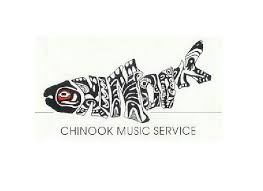</center>

# Table of Contents
* [1 Introduction ](#1)
  * [1.1 Insights & Summary](#1.1)
* [2 Import Libraries](#2)
* [3 Load the dataset from mysql database](#3)
  * [3.1 Make different datasets for the different groups](#3.1)
* [4 Checking for duplicates in the dataset and get information about the dataset](#4)
  * [4.1 check the shape of dataframes](#4.1)
  * [4.2 Display the first few rows of each Dataset](#4.2)
  * [4.3 Check information about the data & unique values number & drop duplicates if it needed](#4.3)
* [5 Keywords ditribution plots](#5)
  * [5.1 Number of Tracks per Album](#5.1)
  * [5.2 Number of Albums per Artist](#5.2)
  * [5.3 Tracks Durations](#5.3)
  * [5.4 Total Purchases per Customer](#5.4)
* [6 Some Useful Information](#6)
  * [6.1 Total Revenue by Month](#6.1)
  * [6.2 Customer Retention](#6.2)
  * [6.3 Top Genres by Revenue](#6.3)
  * [6.4 Total Revenue Contributed by each Employee](#6.4)
* [7 Hypothesis Testing](#7)
  * [7.1 Mean Price of Top3-Selling Genres](#7.1)
  * [7.2 Independence between Track Length and Price](#7.2)
  * [7.3 Independence Between the Genre of a Track and its Mediatype](#7.3)
  * [7.4 Correlation Between Number of Unique Genres and Total Number of Tracks](#7.4)
* [8 Confidence Intervals](#8)
  * [8.1 the 95% Confidence Interval for the Mean Lengths of Songs in each Genre](#8.1)
  * [8.2 95% Confidence Interval Bounds for each Country](#8.2)
  * [8.3 The Average Number of Songs Purchased Along with the Confidence Interval Bounds](#8.3)
  

<a id='1'></a>
# 1 Introduction

The objective of this project is to present an extensive analysis of the **Chinook Database**. The Chinook databes is a sample database used for teaching. it is an open source database that simiulates a music store with information about customers, employees, albums, songs, playlists, etc.
The project is on one notbook that  will focus on diffrent subjects. 

You can also : 
* Check the **GitHub Project Repository**


[![](https://img.shields.io/badge/Chinook%20Data%20Project-GitHub-100000?logo=github&logoColor=white)](https://github.com/HosseinFaghihi/chinook-data-analysis.git)

<a id='2'></a>
# 2 Import Libraries

In [52]:
import pandas as pd
import json
import mysql.connector 
import matplotlib.pyplot as plt  
from matplotlib.ticker import FuncFormatter
import seaborn as sns  
import matplotlib.dates as mdates 
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from datetime import datetime 

<a id='3'></a>
# 3 Load dataset from mysql database

In [45]:
with open(r'F:\daneshkar\my github\Chinook_project\1.json', 'r') as config_file:
    db_config = json.load(config_file)

In [46]:
connection = mysql.connector.connect(
    host=db_config['host'],
    port=db_config['port'],
    user=db_config['user'],
    password=db_config['password'],
    database=db_config['database']
)

In [47]:
# List of tables in the Chinook database  
tables = ['album', 'artist',
            'customer', 'employee',
            'genre', 'invoice',
            'invoiceline', 'mediatype',
            'playlist', 'playlisttrack',
            'track'
            ]  

    # Create a dictionary to store DataFrames  
chinook = {}  

for table in tables:  
        # Read each table into a DataFrame  
        query = f"SELECT * FROM {table};"  
        chinook[table] = pd.read_sql(query, connection)
        print(f"Loaded {table}.")  

C:\Users\IHC\AppData\Local\Temp\ipykernel_8024\1480886009.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  chinook[table] = pd.read_sql(query, connection)


Loaded album.
Loaded artist.
Loaded customer.
Loaded employee.
Loaded genre.
Loaded invoice.
Loaded invoiceline.
Loaded mediatype.
Loaded playlist.
Loaded playlisttrack.
Loaded track.


<a id='3.1'></a>
# 3.1 Make different datasets for the different groups

In [48]:
album = chinook['album']
artist = chinook['artist']
customer = chinook['customer']
employee = chinook['employee']
genre = chinook['genre']
invoice = chinook['invoice']
invoice_line = chinook['invoiceline']
media_type = chinook['mediatype']
playlist = chinook['playlist']
playlist_track = chinook['playlisttrack']
track = chinook['track']

<a id='4'></a>
# 4 Checking for duplicates in the dataset and get information about the dataset

<a id='4.1'></a>
# 4.1 check the shape of dataframes

In [16]:
# Display the shape of each DataFrame
for group_name, df in chinook.items():
    print(f'Group: {group_name}, Shape: {df.shape}')

Group: album, Shape: (347, 3)
Group: artist, Shape: (275, 2)
Group: customer, Shape: (59, 13)
Group: employee, Shape: (8, 15)
Group: genre, Shape: (25, 2)
Group: invoice, Shape: (412, 9)
Group: invoiceline, Shape: (2240, 5)
Group: mediatype, Shape: (5, 2)
Group: playlist, Shape: (18, 2)
Group: playlisttrack, Shape: (8715, 2)
Group: track, Shape: (3503, 9)


<a id='4.2'></a>
# 4.2 Display the first few rows of each Dataset

In [17]:
album.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [18]:
artist.head()

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [19]:
customer.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [20]:
employee.head(10)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01,2003-10-17,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29,2004-01-02,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09,2004-03-04,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [21]:
genre.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [22]:
invoice.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2021-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2021-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2021-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2021-01-11,69 Salem Street,Boston,MA,USA,2113,13.86


In [23]:
invoice_line.head()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


In [24]:
media_type.head()

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [25]:
playlist.head()

,PlaylistId,Name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music


In [26]:
playlist_track.head()

,PlaylistId,TrackId
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [27]:
track.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


<a id='4.3'></a> 
# 4.3 Check information about the data & unique values number & drop duplicates if it needed

In [28]:
album.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


In [29]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(album['AlbumId'].index),len(album['AlbumId'].drop_duplicates(keep='last').index)))

Known observations: 347
Unique observations: 347


In [30]:
artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [31]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(artist['ArtistId'].index),len(artist['ArtistId'].drop_duplicates(keep='last').index)))

Known observations: 275
Unique observations: 275


In [32]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-null     object
 4   Address       59 non-null     object
 5   City          59 non-null     object
 6   State         30 non-null     object
 7   Country       59 non-null     object
 8   PostalCode    55 non-null     object
 9   Phone         58 non-null     object
 10  Fax           12 non-null     object
 11  Email         59 non-null     object
 12  SupportRepId  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


In [33]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(customer['CustomerId'].index),len(customer['CustomerId'].drop_duplicates(keep='last').index)))

Known observations: 59
Unique observations: 59


In [34]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EmployeeId  8 non-null      int64         
 1   LastName    8 non-null      object        
 2   FirstName   8 non-null      object        
 3   Title       8 non-null      object        
 4   ReportsTo   7 non-null      float64       
 5   BirthDate   8 non-null      datetime64[ns]
 6   HireDate    8 non-null      datetime64[ns]
 7   Address     8 non-null      object        
 8   City        8 non-null      object        
 9   State       8 non-null      object        
 10  Country     8 non-null      object        
 11  PostalCode  8 non-null      object        
 12  Phone       8 non-null      object        
 13  Fax         8 non-null      object        
 14  Email       8 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(11)
memory usage: 1.1+ KB


In [58]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(employee['EmployeeId'].index),len(employee['EmployeeId'].drop_duplicates(keep='last').index)))

Known observations: 8
Unique observations: 8


In [43]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GenreId  25 non-null     int64 
 1   Name     25 non-null     object
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


In [59]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(genre['GenreId'].index),len(genre['GenreId'].drop_duplicates(keep='last').index)))

Known observations: 25
Unique observations: 25


In [44]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceId          412 non-null    int64         
 1   CustomerId         412 non-null    int64         
 2   InvoiceDate        412 non-null    datetime64[ns]
 3   BillingAddress     412 non-null    object        
 4   BillingCity        412 non-null    object        
 5   BillingState       210 non-null    object        
 6   BillingCountry     412 non-null    object        
 7   BillingPostalCode  384 non-null    object        
 8   Total              412 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 29.1+ KB


In [60]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(invoice['InvoiceId'].index),len(invoice['InvoiceId'].drop_duplicates(keep='last').index)))

Known observations: 412
Unique observations: 412


In [45]:
invoice_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceLineId  2240 non-null   int64  
 1   InvoiceId      2240 non-null   int64  
 2   TrackId        2240 non-null   int64  
 3   UnitPrice      2240 non-null   float64
 4   Quantity       2240 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 87.6 KB


In [61]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(invoice_line['InvoiceLineId'].index),len(invoice_line['InvoiceLineId'].drop_duplicates(keep='last').index)))

Known observations: 2240
Unique observations: 2240


In [46]:
media_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MediaTypeId  5 non-null      int64 
 1   Name         5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [62]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(media_type['MediaTypeId'].index),len(media_type['MediaTypeId'].drop_duplicates(keep='last').index)))

Known observations: 5
Unique observations: 5


In [47]:
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PlaylistId  18 non-null     int64 
 1   Name        18 non-null     object
dtypes: int64(1), object(1)
memory usage: 420.0+ bytes


In [63]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(playlist['PlaylistId'].index),len(playlist['PlaylistId'].drop_duplicates(keep='last').index)))

Known observations: 18
Unique observations: 18


In [48]:
playlist_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PlaylistId  8715 non-null   int64
 1   TrackId     8715 non-null   int64
dtypes: int64(2)
memory usage: 136.3 KB


In [65]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(playlist_track[['PlaylistId','TrackId']].index),len(playlist_track[['PlaylistId','TrackId']].drop_duplicates(keep='last').index)))

Known observations: 8715
Unique observations: 8715


In [6]:
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2526 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


In [66]:
# check the number of unique observations
print('Known observations: {}\nUnique observations: {}'.format(len(track['TrackId'].index),len(track['TrackId'].drop_duplicates(keep='last').index)))

Known observations: 3503
Unique observations: 3503


<a id='5'></a> 
# 5 Keywords ditribution plots and normality tests

<a id='5.1'></a> 
# 5.1 Number of Tracks per Album

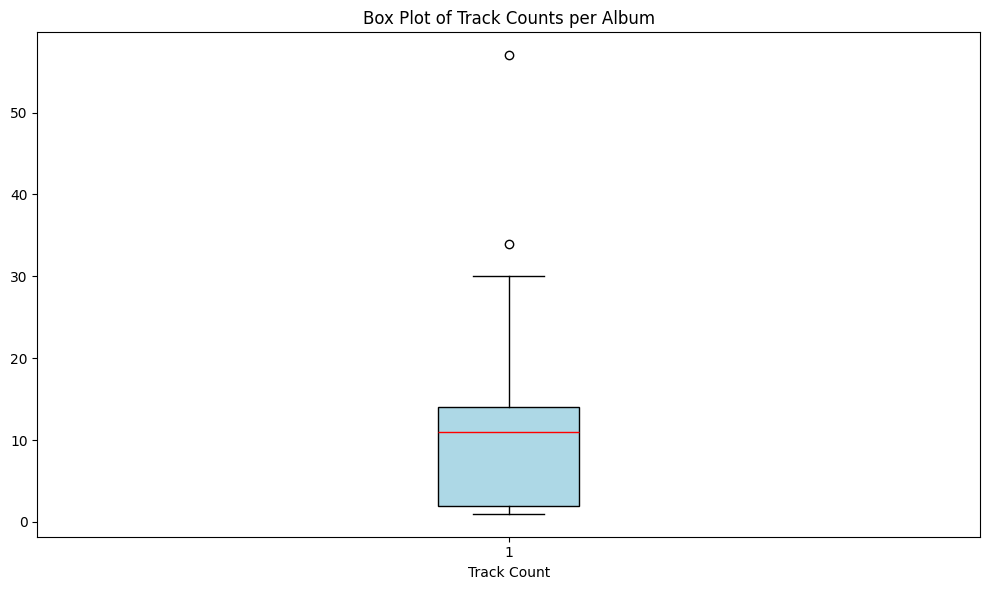

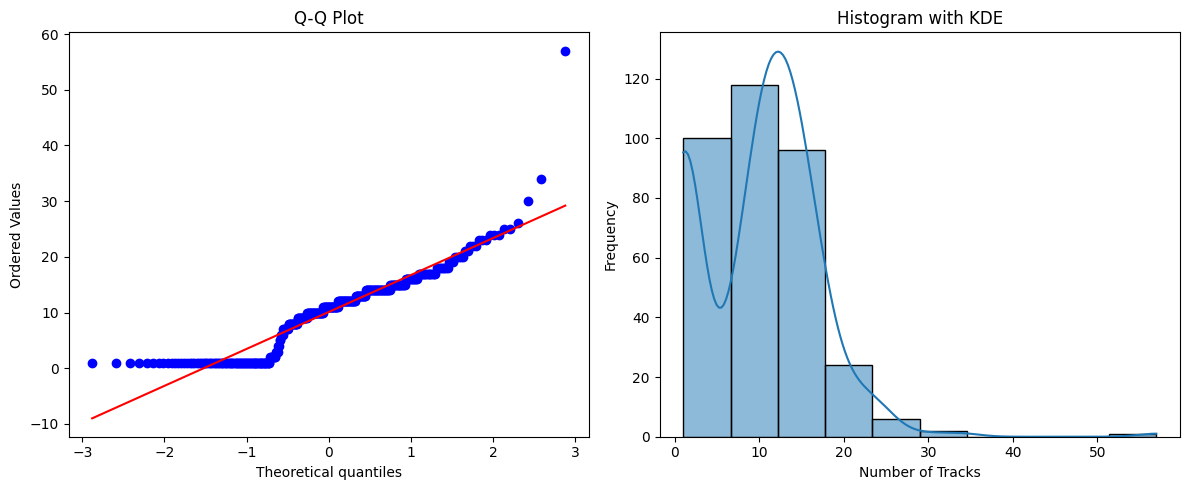

Shapiro-Wilk Statistic: 0.8880886807416963, p-value: 3.0437154396080396e-15
The data does not follow a normal distribution (reject H0)


In [155]:
# Grouping the number of tracks by AlbumId  
track_per_album = chinook['track'].groupby('AlbumId').size().reset_index(name='Number of Tracks')  

# Box Plot  
plt.figure(figsize=(10, 6))  
plt.boxplot(track_per_album['Number of Tracks'], vert=True, patch_artist=True,  
            boxprops=dict(facecolor='lightblue', color='black'),  
            medianprops=dict(color='red'))   
plt.title('Box Plot of Track Counts per Album')
plt.xlabel('Track Count')  

plt.tight_layout()  
plt.show()
# Plot Q-Q Plot  
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)  
stats.probplot(track_per_album['Number of Tracks'], dist="norm", plot=plt)  
plt.title('Q-Q Plot')  

# Create a histogram with KDE  
plt.subplot(1, 2, 2)  
sns.histplot(track_per_album['Number of Tracks'], bins=10, kde=True)  
plt.title('Histogram with KDE')  
plt.xlabel('Number of Tracks')  
plt.ylabel('Frequency')  

plt.tight_layout()  
plt.show()  

# Shapiro-Wilk Test for Normality  
shapiro_stat, shapiro_p = stats.shapiro(track_per_album['Number of Tracks'])  
print(f'Shapiro-Wilk Statistic: {shapiro_stat}, p-value: {shapiro_p}')  

# Interpret the result  
alpha = 0.05  
if shapiro_p > alpha:  
    print("The data follows a normal distribution (fail to reject H0)")  
else:  
    print("The data does not follow a normal distribution (reject H0)")  

<a id='5.2'></a> 
# 5.2 Number of Albums per Artist

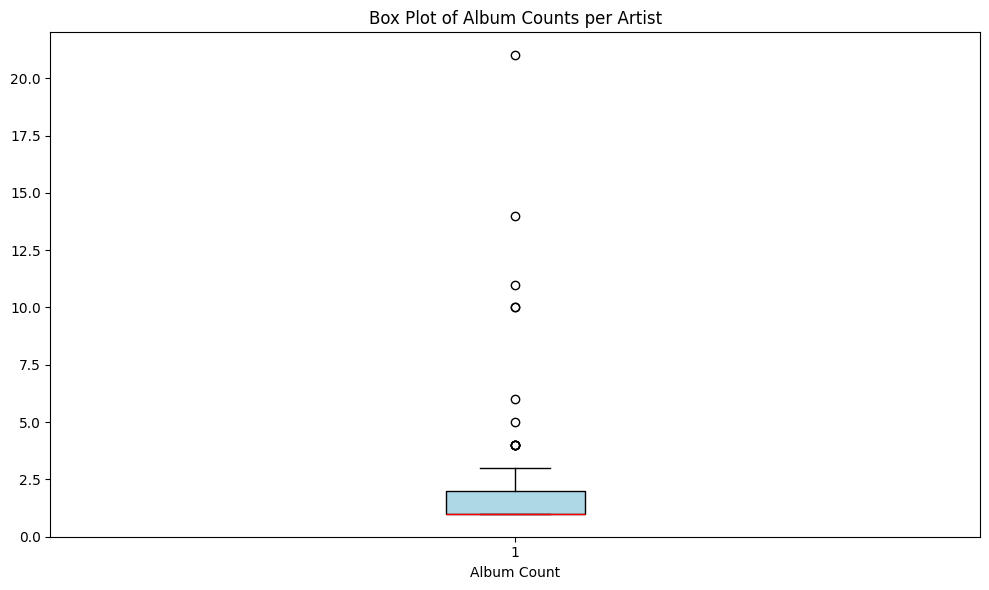

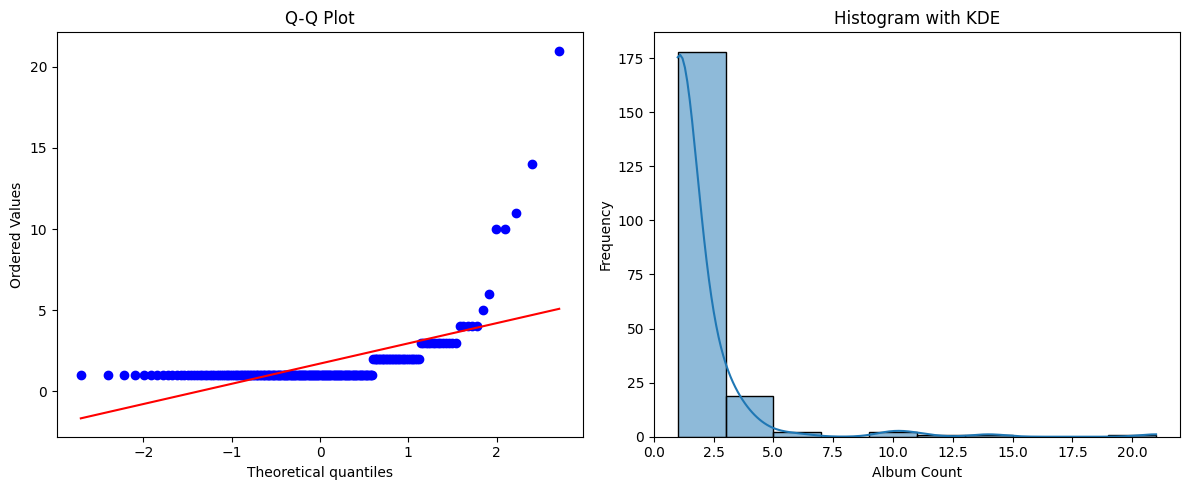

Shapiro-Wilk Statistic: 0.3541542798729296, p-value: 2.2705283315413137e-26
The data does not follow a normal distribution (reject H0)


In [128]:
# Count the number of albums per artist  
album_counts = album['ArtistId'].value_counts().reset_index()  
album_counts.columns = ['ArtistId', 'Album Count']  

# Merge with the artists dataset to get artist names  
track_per_album= album_counts.merge(artist[['ArtistId', 'Name']], on='ArtistId', how='left')  

# Box Plot  
plt.figure(figsize=(10, 6))  
plt.boxplot(track_per_album['Album Count'], vert=True, patch_artist=True,  
            boxprops=dict(facecolor='lightblue', color='black'),  
            medianprops=dict(color='red'))   
plt.title('Box Plot of Album Counts per Artist')  
plt.xlabel('Album Count')  

plt.tight_layout()  
plt.show()
# Plot Q-Q Plot  
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)  
stats.probplot(track_per_album['Album Count'], dist="norm", plot=plt)  
plt.title('Q-Q Plot')  

# Create a histogram with KDE  
plt.subplot(1, 2, 2)  
sns.histplot(track_per_album['Album Count'], bins=10, kde=True)  
plt.title('Histogram with KDE')  
plt.xlabel('Album Count')  
plt.ylabel('Frequency')  

plt.tight_layout()  
plt.show()  

# Shapiro-Wilk Test for Normality  
shapiro_stat, shapiro_p = stats.shapiro(track_per_album['Album Count'])  
print(f'Shapiro-Wilk Statistic: {shapiro_stat}, p-value: {shapiro_p}')  

# Interpret the result  
alpha = 0.05  
if shapiro_p > alpha:  
    print("The data follows a normal distribution (fail to reject H0)")  
else:  
    print("The data does not follow a normal distribution (reject H0)")  

<a id='5.3'></a> 
# 5.3 Tracks Durations

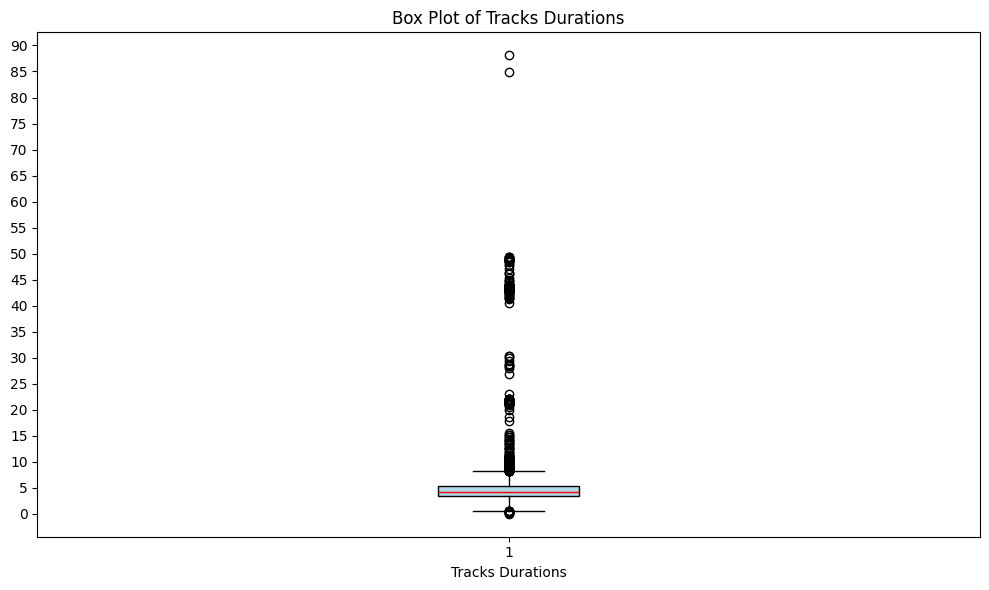

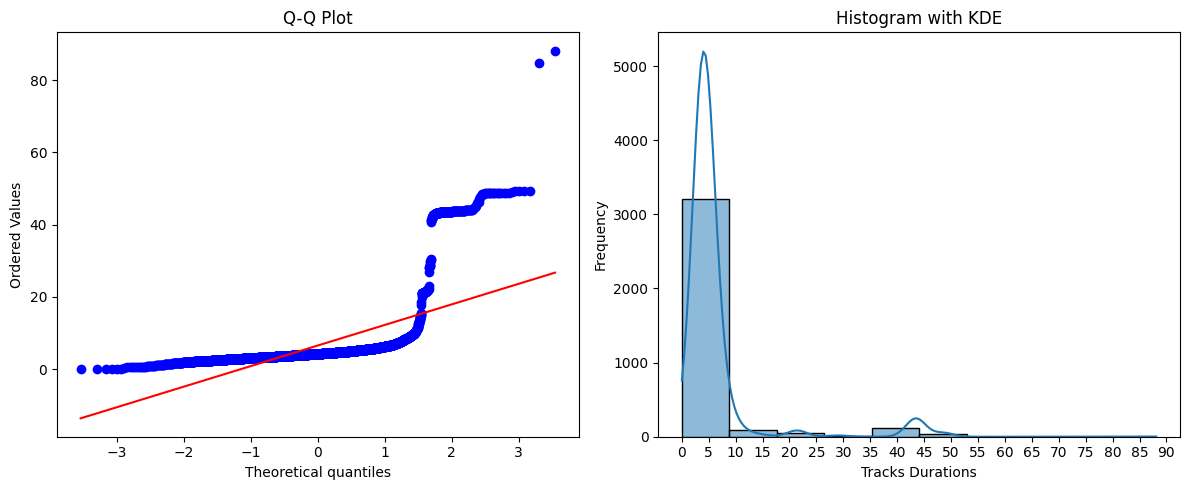

Shapiro-Wilk Statistic: 0.40693509805829453, p-value: 2.7287436202313686e-75
The data does not follow a normal distribution (reject H0)


In [8]:
# Convert milliseconds to minutes  
track['Duration (Minutes)'] = track['Milliseconds'] / (1000 * 60)  

# Box Plot  
plt.figure(figsize=(10, 6))  
plt.boxplot(track['Duration (Minutes)'] , vert=True, patch_artist=True,  
            boxprops=dict(facecolor='lightblue', color='black'),  
            medianprops=dict(color='red'))   
plt.title('Box Plot of Tracks Durations')  
plt.xlabel('Tracks Durations')  
plt.yticks(ticks=range(0, 91, 5)) 

plt.tight_layout()  
plt.show()
# Plot Q-Q Plot  
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)  
stats.probplot(track['Duration (Minutes)'] , dist="norm", plot=plt)  
plt.title('Q-Q Plot')  

# Create a histogram with KDE  
plt.subplot(1, 2, 2)  
sns.histplot(track['Duration (Minutes)'] , bins=10, kde=True)  
plt.title('Histogram with KDE')  
plt.xlabel('Tracks Durations')  
plt.ylabel('Frequency')  

# Setting x-axis ticks 
plt.xticks(ticks=range(0, 91, 5))  

plt.tight_layout()  
plt.show()  

# Shapiro-Wilk Test for Normality  
shapiro_stat, shapiro_p = stats.shapiro(track['Duration (Minutes)'] )  
print(f'Shapiro-Wilk Statistic: {shapiro_stat}, p-value: {shapiro_p}')  

# Interpret the result  
alpha = 0.05  
if shapiro_p > alpha:  
    print("The data follows a normal distribution (fail to reject H0)")  
else:  
    print("The data does not follow a normal distribution (reject H0)")  

<a id='5.4'></a> 
# 5.4 Total Purchases per Customer

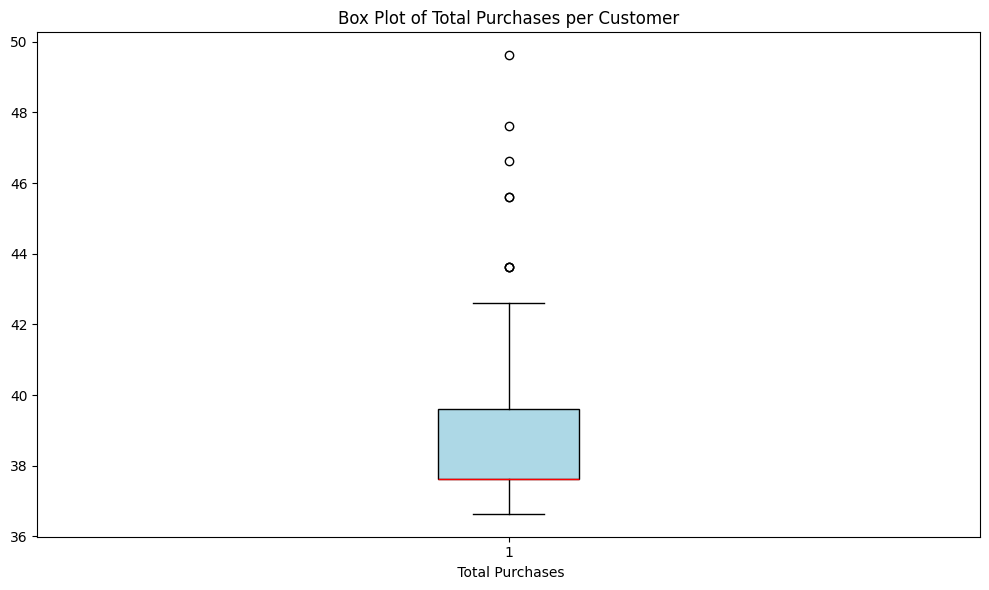

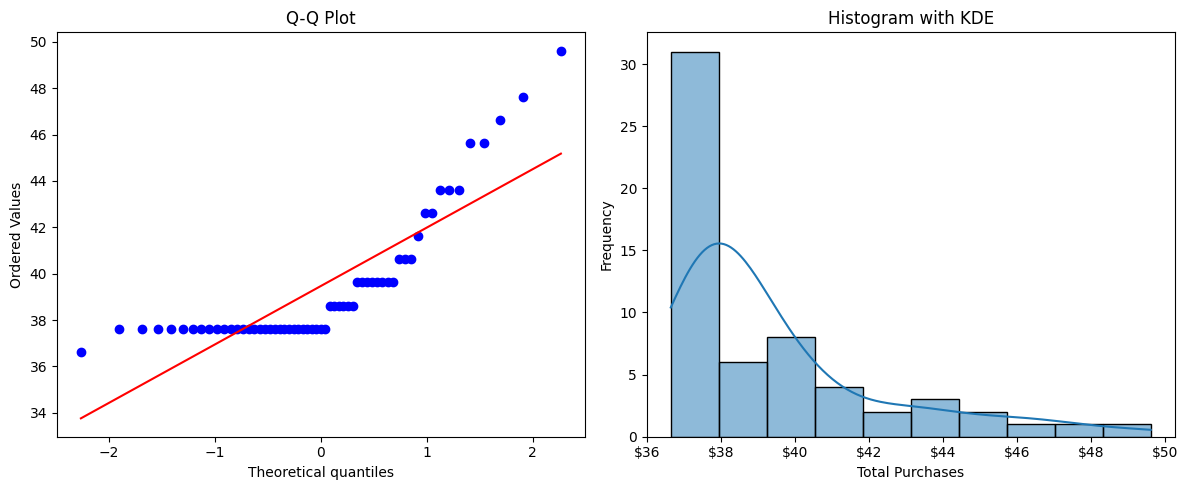

Shapiro-Wilk Statistic: 0.7178631571675498, p-value: 2.454948426502284e-09
The data does not follow a normal distribution (reject H0)


In [154]:
customer_purchases = invoice.groupby('CustomerId')['Total'].sum().reset_index()

# Define a formatter function to add a dollar sign to the x-ticks  
def currency_formatter(x, pos):  
    return f'${int(x):,}'  # Format as currency with commas  

# Box Plot  
plt.figure(figsize=(10, 6))  
plt.boxplot(customer_purchases['Total'] , vert=True, patch_artist=True,  
            boxprops=dict(facecolor='lightblue', color='black'),  
            medianprops=dict(color='red'))   
plt.title('Box Plot of Total Purchases per Customer')  
plt.xlabel(' Total Purchases')  


plt.tight_layout()  
plt.show()
# Plot Q-Q Plot  
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)  
stats.probplot(customer_purchases['Total'] , dist="norm", plot=plt)  
plt.title('Q-Q Plot')  

# Create a histogram with KDE  
plt.subplot(1, 2, 2)  
sns.histplot(customer_purchases['Total'] , bins=10, kde=True)  
plt.title('Histogram with KDE')  
plt.xlabel('Total Purchases')  
plt.ylabel('Frequency')  

# Set the x-ticks formatter to add dollar signs  
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))  

# # Setting x-axis ticks 
# plt.xticks(ticks=range(6, 8, 1))  

plt.tight_layout()  
plt.show()  

# Shapiro-Wilk Test for Normality  
shapiro_stat, shapiro_p = stats.shapiro(customer_purchases['Total'] )  
print(f'Shapiro-Wilk Statistic: {shapiro_stat}, p-value: {shapiro_p}')  

# Interpret the result  
alpha = 0.05  
if shapiro_p > alpha:  
    print("The data follows a normal distribution (fail to reject H0)")  
else:  
    print("The data does not follow a normal distribution (reject H0)")  


<a id='6'></a> 
# 6 Some Useful Information

<a id='6.1'></a> 
# 6.1 Total Revenue by Month:

 This time series plot shows how revenue fluctuated over months.

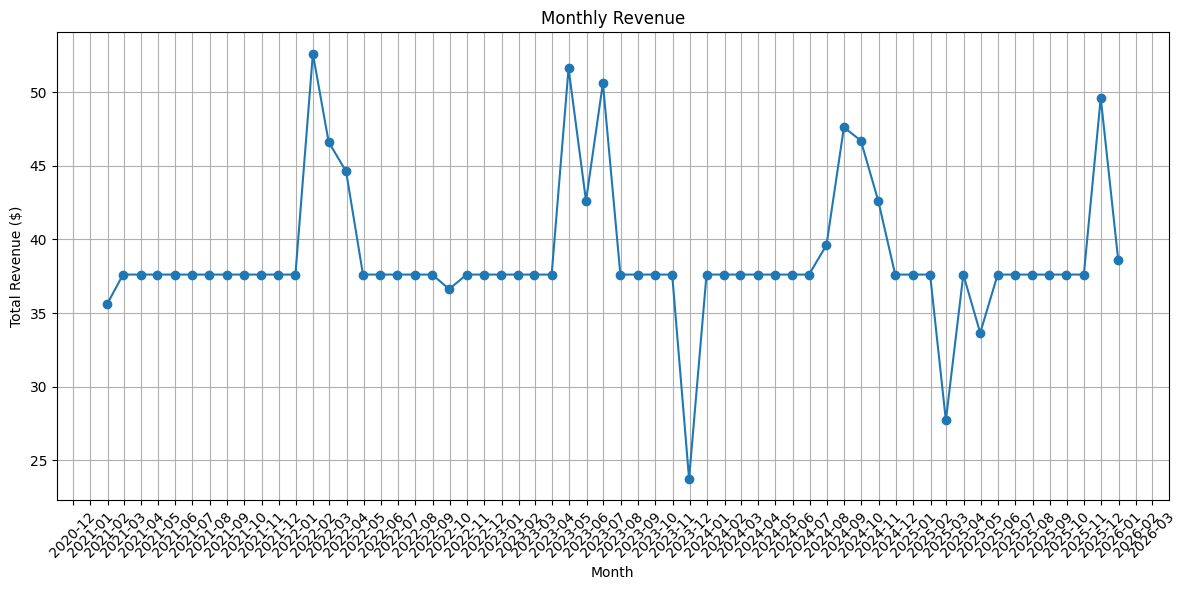

In [228]:
# Set InvoiceDate as the index for resampling  
invoice1=invoice[['InvoiceDate', 'Total']]
invoice1.set_index('InvoiceDate', inplace=True)  

# Calculate total revenue by month  
monthly_revenue = invoice1.resample('ME')['Total'].sum()  

# Plotting the monthly revenue  
plt.figure(figsize=(12, 6))  
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')  
plt.title('Monthly Revenue')  
plt.xlabel('Month')  
plt.ylabel('Total Revenue ($)')  
plt.grid()  

# Format the x-axis to show every month  
ax = plt.gca()  # Get the current axes  
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Every month  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month  

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

<a id='6.2'></a> 
# 6.2 Customer Retention:

 A line plot that shows the number of unique customers for each year, helping to assess if there's growth in the customer base over time.

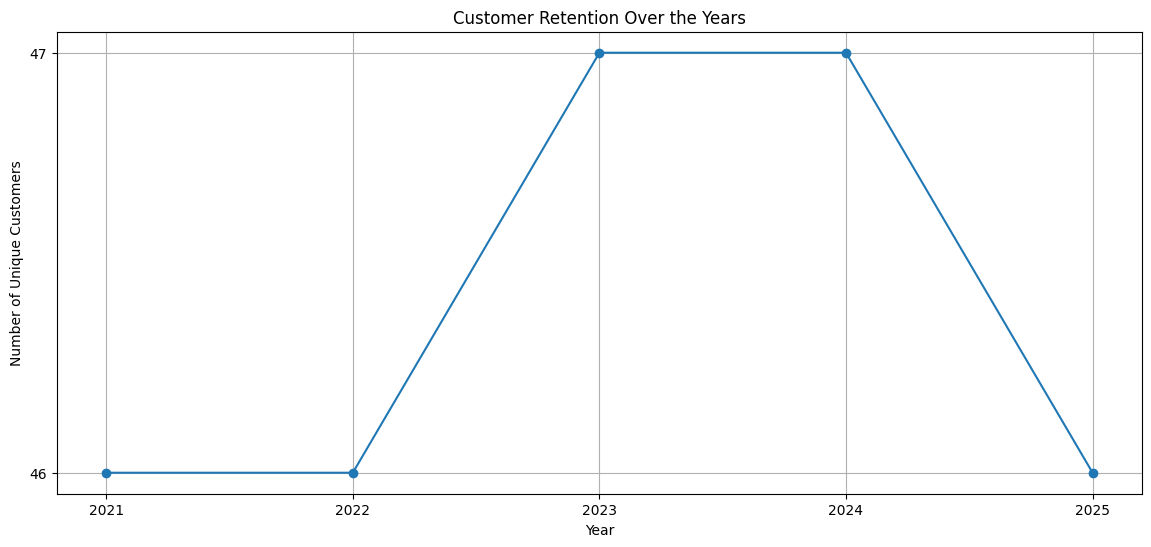

In [231]:
# Customer Retention by Year  
invoice['Year'] = invoice['InvoiceDate'].dt.year  
customer_retention = invoice.groupby('Year')['CustomerId'].nunique()  

plt.figure(figsize=(14, 6))  
customer_retention.plot(marker='o')  
plt.title('Customer Retention Over the Years')  
plt.xlabel('Year')  
plt.ylabel('Number of Unique Customers')  
plt.grid()  
plt.xticks(ticks=range(2021, 2026, 1))  
plt.yticks(ticks=range(46, 48, 1))
plt.show() 

<a id='6.3'></a> 
# 6.3 Top Genres by Revenue:

 This analysis shows which music genres are most profitable, providing insight into customer preferences.

C:\Users\IHC\AppData\Local\Temp\ipykernel_3592\3179232620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UnitPrice', y='Name', data=top_genres, palette='mako')


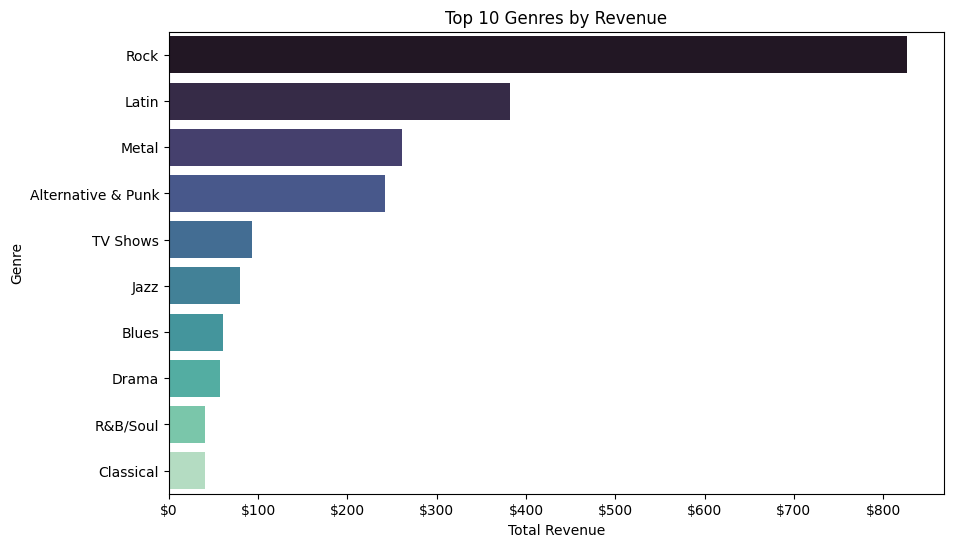

In [239]:
# Top Genres by Revenue  
track_genre_revenue = invoice_line.merge(track[['TrackId', 'GenreId']], on='TrackId').groupby('GenreId')['UnitPrice'].sum()  
top_genres = track_genre_revenue.nlargest(10).reset_index()  
top_genres = top_genres.merge(genre[['GenreId', 'Name']], on='GenreId')  

plt.figure(figsize=(10, 6))  
sns.barplot(x='UnitPrice', y='Name', data=top_genres, palette='mako')  
plt.title('Top 10 Genres by Revenue')  
plt.xlabel('Total Revenue')  
plt.ylabel('Genre')  
# Set the x-ticks formatter to add dollar signs  
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))  
plt.show()  

<a id='6.4'></a> 
# 6.4 Total Revenue Contributed by each Employee

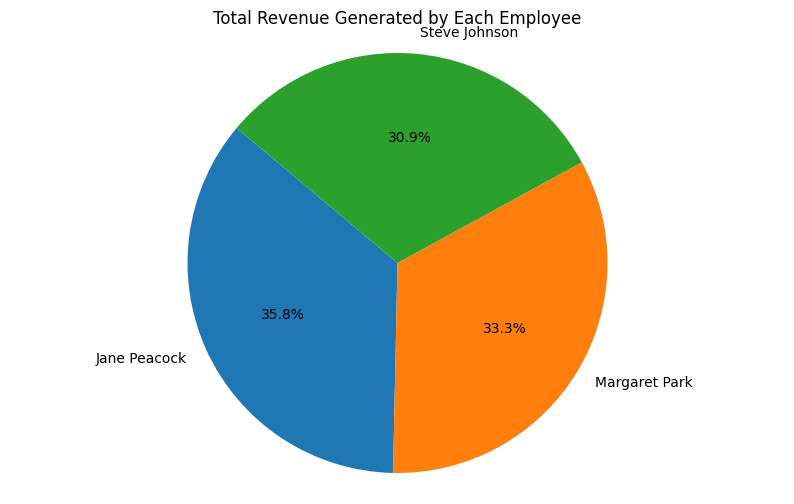

In [264]:
# Merge the DataFrames to associate invoices with employees through customers  
merged_data = pd.merge(invoice, customer, how='left', on='CustomerId')  
merged_data = pd.merge(merged_data, employee, how='left', left_on='SupportRepId', right_on='EmployeeId')  

# Calculate total revenue per employee  
total_revenue_by_employee = merged_data.groupby(['FirstName_y', 'LastName_y'])['Total'].sum().reset_index()  

# Rename columns for better clarity  
total_revenue_by_employee.columns = ['First Name_y', 'Last Name_y', 'Total Revenue']  

# Create a pie chart  
plt.figure(figsize=(10, 6))  
plt.pie(total_revenue_by_employee['Total Revenue'],   
        labels=total_revenue_by_employee['First Name_y'] + ' ' + total_revenue_by_employee['Last Name_y'],   
        autopct='%1.1f%%', startangle=140)  

plt.title('Total Revenue Generated by Each Employee')  
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.  
plt.show()

<a id='7'></a> 
# 7 Hypothesis Testing

<a id='7.1'></a> 
# 7.1 Mean Price of Top3-Selling Genres

In [9]:
# Merge tracks with genres
tracks_genres = pd.merge(track, genre, on='GenreId')

# Merge the result with invoice lines to get the number of tracks sold per genre
tracks_sales = pd.merge(tracks_genres, invoice_line, on='TrackId')

# Group by genre and count the number of tracks sold
genre_sales = tracks_sales.groupby('Name_y').size().reset_index(name='NumberOfTracksSold')

# Sort genres by the number of tracks sold in descending order
top_genres = genre_sales.sort_values(by='NumberOfTracksSold', ascending=False).head(3)

print("Top 3 Most Popular Genres:")
print(top_genres)


Top 3 Most Popular Genres:
   Name_y  NumberOfTracksSold
17   Rock                 835
12  Latin                 386
13  Metal                 264


In [12]:
# Filter the sales data to include only the top 3 genres
top_genres_list = top_genres['Name_y'].tolist()
top_genres_sales = tracks_sales[tracks_sales['Name_y'].isin(top_genres_list)]

# Calculate the average price for each of the top 3 genres
average_price_by_genre = top_genres_sales.groupby('Name_y')['UnitPrice_y'].mean().reset_index(name='AveragePrice')

print("\nAverage Prices for Top 3 Genres:")
print(average_price_by_genre)



Average Prices for Top 3 Genres:
  Name_y  AveragePrice
0  Latin          0.99
1  Metal          0.99
2   Rock          0.99


In [33]:
from scipy.stats import ttest_ind

# Separate the data for each of the top genres
genre1_data = top_genres_sales[top_genres_sales['Name_y'] == top_genres_list[0]]['UnitPrice_y']
genre2_data = top_genres_sales[top_genres_sales['Name_y'] == top_genres_list[1]]['UnitPrice_y']
genre3_data = top_genres_sales[top_genres_sales['Name_y'] == top_genres_list[2]]['UnitPrice_y']

# Perform t-tests
t_stat_1_2, p_value_1_2 = ttest_ind(genre1_data, genre2_data, equal_var=False)
t_stat_1_3, p_value_1_3 = ttest_ind(genre1_data, genre3_data, equal_var=False)
t_stat_2_3, p_value_2_3 = ttest_ind(genre2_data, genre3_data, equal_var=False)

print("\nT-test Results:")
print(f"Genre {top_genres_list[0]} vs Genre {top_genres_list[1]}: p-value = {p_value_1_2}  the means of the two groups are significantly different")
print(f"Genre {top_genres_list[0]} vs Genre {top_genres_list[2]}: p-value = {p_value_1_3} the means of the two groups are likely similar")
print(f"Genre {top_genres_list[1]} vs Genre {top_genres_list[2]}: p-value = {p_value_2_3}  the means of the two groups are significantly different")



T-test Results:
Genre Rock vs Genre Latin: p-value = 1.1526984441702801e-127  the means of the two groups are significantly different
Genre Rock vs Genre Metal: p-value = 1.0 the means of the two groups are likely similar
Genre Latin vs Genre Metal: p-value = 1.7988548860493843e-41  the means of the two groups are significantly different


<a id='7.2'></a> 
# 7.2 Independence between Track Length and Price

In [36]:
# Extract track lengths and prices
track_data = track[['TrackId', 'Milliseconds']]
invoice_data = invoice_line[['TrackId', 'UnitPrice']]

# Merge track data with invoice data
merged_data = pd.merge(track_data, invoice_data, on='TrackId')

# Extract relevant columns
lengths = merged_data['Milliseconds']  # Track length in milliseconds
prices = merged_data['UnitPrice']       # Price in dollars

# Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr(lengths, prices)

# Print the results
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between track length and price.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between track length and price.")


Pearson correlation coefficient: 0.933532826565004
P-value: 0.0
Reject the null hypothesis: There is a significant correlation between track length and price.


<a id='7.3'></a> 
# 7.3 Independence Between the Genre of a Track and its Mediatype

In [37]:
# Merge track data with genre and media type data
merged_data = track.merge(genre, on='GenreId').merge(media_type, on='MediaTypeId')

# Create a contingency table of Genre and MediaType
contingency_table = pd.crosstab(merged_data['Name_x'], merged_data['Name_y'])  # Name_x is Genre, Name_y is MediaType

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between genre and media type.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between genre and media type.")


Chi-square statistic: 81992.32655526896
P-value: 4.8184819387290935e-22
Degrees of freedom: 78144
Reject the null hypothesis: There is a significant association between genre and media type.


<a id='7.4'></a> 
# 7.4 Correlation Between Number of Unique Genres and Total Number of Tracks Per Playlist

In [43]:
# Merge playlist_track with track and genre to get genre information for each track in playlists
merged_data = playlist_track.merge(track, on='TrackId').merge(genre, on='GenreId')

# Calculate the number of unique genres and total tracks in each playlist
playlist_genre_data = merged_data.groupby('PlaylistId').agg(
    NumUniqueGenres=('GenreId', 'nunique'),
    NumTracks=('TrackId', 'count')
).reset_index()

# Calculate correlation between number of unique genres and total number of tracks
correlation, p_value = pearsonr(playlist_genre_data['NumUniqueGenres'], playlist_genre_data['NumTracks'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')


Correlation coefficient: 0.9667412729612781
P-value: 1.818739051205218e-08


به طور کلی، تحلیل شما نشان می‌دهد که پلی‌لیست‌هایی که تنوع بیشتری از ژانرهای موسیقی دارند، معمولاً تعداد بیشتری از آهنگ‌ها را نیز شامل می‌شوند. این ممکن است به این معنا باشد که کاربرانی که به کشف سبک‌های مختلف موسیقی علاقه‌مند هستند، به طور کلی پلی‌لیست‌های بیشتری با محتوای زیاد گوش می‌دهند یا ایجاد می‌کنند.

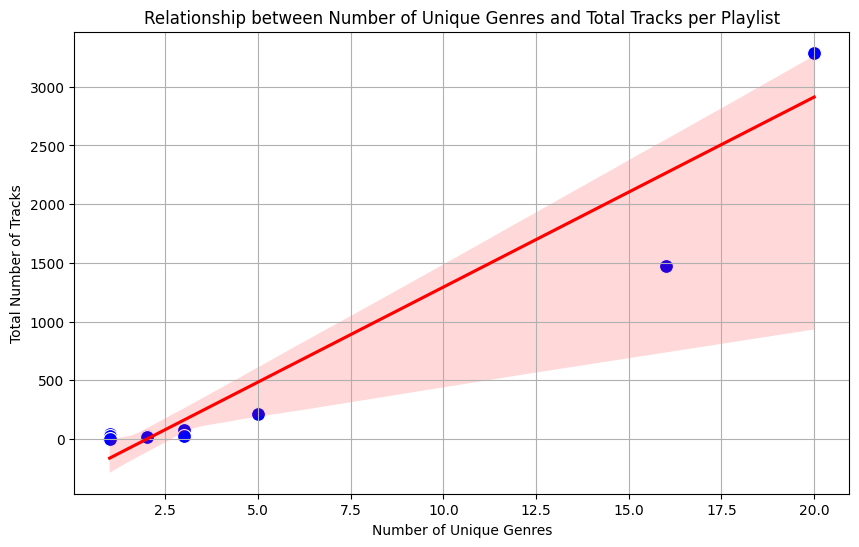

In [44]:
# Create a scatter plot  
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=playlist_genre_data, x='NumUniqueGenres', y='NumTracks', color='blue', s=100)  

# Optionally, you can add a regression line  
sns.regplot(data=playlist_genre_data, x='NumUniqueGenres', y='NumTracks', scatter=False, color='red')  

# Adding titles and labels  
plt.title('Relationship between Number of Unique Genres and Total Tracks per Playlist')  
plt.xlabel('Number of Unique Genres')  
plt.ylabel('Total Number of Tracks')  
plt.grid(True)  

# Show the plot  
plt.show()  

<a id='8'></a> 
# 8 Confidence Intervals

<a id='8.1'></a> 
# 8.1 the 95% Confidence Interval for the Mean Lengths of Songs in each Genre

In [14]:

# Group by genre and calculate mean and std  
# Merge the tracks with genres  
merged_df = track.merge(genre, on='GenreId')  

# Group by genre and calculate mean and std  
genre_stats = merged_df.groupby('Name_y')['Duration (Minutes)'].agg(['mean', 'std', 'count'])  

# Calculate 95% confidence interval  
confidence_level = 0.95  
degrees_freedom = genre_stats['count'] - 1  
confidence_interval = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)  

genre_stats['margin_of_error'] = confidence_interval * (genre_stats['std'] / np.sqrt(genre_stats['count']))  
genre_stats['lower_bound'] = genre_stats['mean'] - genre_stats['margin_of_error']  
genre_stats['upper_bound'] = genre_stats['mean'] + genre_stats['margin_of_error']  

# Display results  
print(genre_stats[['mean', 'lower_bound', 'upper_bound']])

                         mean  lower_bound  upper_bound
Name_y                                                 
Alternative          4.400975     3.969865     4.832086
Alternative & Punk   3.905897     3.764253     4.047542
Blues                4.505996     4.148473     4.863520
Bossa Nova           3.659833     2.928820     4.390847
Classical            4.897793     4.375286     5.420300
Comedy              26.421062    22.843583    29.998540
Drama               42.921396    40.766514    45.076278
Easy Listening       3.152737     2.851101     3.454373
Electronica/Dance    5.049763     4.572188     5.527339
Heavy Metal          4.957549     4.217925     5.697173
Hip Hop/Rap          2.969605     2.526496     3.412713
Jazz                 4.862590     4.489145     5.236034
Latin                3.880988     3.789519     3.972456
Metal                5.162491     4.979660     5.345321
Opera                2.913550          NaN          NaN
Pop                  3.817235     3.430566     4

<a id='8.2'></a> 
# 8.2 95% Confidence Interval Bounds for each Country

In [17]:
# Calculate mean, standard deviation, and count of sales for each country  
country_stats = invoice.groupby('BillingCountry')['Total'].agg(['mean', 'std', 'count'])  

# Calculate the 95% confidence interval  
confidence_level = 0.95  
degrees_freedom = country_stats['count'] - 1  
confidence_interval = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)  

country_stats['margin_of_error'] = confidence_interval * (country_stats['std'] / np.sqrt(country_stats['count']))  
country_stats['lower_bound'] = country_stats['mean'] - country_stats['margin_of_error']  
country_stats['upper_bound'] = country_stats['mean'] + country_stats['margin_of_error']  

# Display results  
print(country_stats[['mean', 'lower_bound', 'upper_bound']])

                    mean  lower_bound  upper_bound
BillingCountry                                    
Argentina       5.374286     1.084404     9.664167
Australia       5.374286     1.084404     9.664167
Austria         6.088571     0.295920    11.881223
Belgium         5.374286     1.084404     9.664167
Brazil          5.431429     3.945992     6.916865
Canada          5.427857     4.268338     6.587377
Chile           6.660000     0.546630    12.773370
Czech Republic  6.445714     2.363986    10.527442
Denmark         5.374286     1.084404     9.664167
Finland         5.945714     1.616139    10.275289
France          5.574286     4.037098     7.111473
Germany         5.588571     3.770560     7.406583
Hungary         6.517143    -0.234038    13.268324
India           5.789231     3.150040     8.428421
Ireland         6.517143    -0.234038    13.268324
Italy           5.374286     1.084404     9.664167
Netherlands     5.802857     1.332210    10.273504
Norway          5.660000     0.

<a id='8.3'></a> 
# 8.3  The Average Number of Songs Purchased Along with the Confidence Interval Bounds

In [43]:

# Count the number of tracks bought in each invoice  
invoice_track_counts = merged_df.groupby('CustomerId')['TrackId'].count().reset_index(name='TracksPurchased')  
# Calculate the mean and standard deviation  
mean_tracks = invoice_track_counts['TracksPurchased'].mean()  
std_tracks = invoice_track_counts['TracksPurchased'].std()  
count_invoices = invoice_track_counts['TracksPurchased'].count()  

# Calculate the 95% confidence interval  
confidence_level = 0.95  
degrees_freedom = count_invoices - 1  
confidence_interval = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)  

margin_of_error = confidence_interval * (std_tracks / np.sqrt(count_invoices))  
lower_bound = mean_tracks - margin_of_error  
upper_bound = mean_tracks + margin_of_error  

# Display results  
print(f'Average number of tracks purchased per invoice: {mean_tracks:.2f}')  
print(f'95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f})')

Average number of tracks purchased per invoice: 37.97
95% confidence interval: (37.90, 38.03)
